<a href="https://colab.research.google.com/github/Mario-HN/DeepLearning/blob/main/WGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Reshape,LeakyReLU,Dropout,Conv2DTranspose, Add, Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization, Input,UpSampling2D, Activation
from tensorflow.keras.optimizers import Adam

## Data Prep

In [ ]:
# !pip install -q kaggle
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# !chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d badasstechie/celebahq-resized-256x256
!unzip "/content/celebahq-resized-256x256.zip" -d "/content/dataset/"

In [4]:
IM_SHAPE = (64,64,3)
LATENT_DIM=100

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/dataset/celeba_hq_256", label_mode=None, image_size=(IM_SHAPE[0], IM_SHAPE[1]), batch_size=128
)

Found 30000 files.


In [6]:
dataset

<_PrefetchDataset element_spec=TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None)>

In [7]:
def preprocess(image):
  return tf.cast(image, tf.float32) / 127.5 - 1.0

In [10]:
train_dataset = (
    dataset
    .map(preprocess)
    .unbatch()
    .shuffle(buffer_size = 1024, reshuffle_each_iteration = True)
    .batch(128, drop_remainder=True)
    .prefetch(tf.data.AUTOTUNE)
)

In [11]:
for d in train_dataset.take(1):
  print(d.shape)

(128, 64, 64, 3)


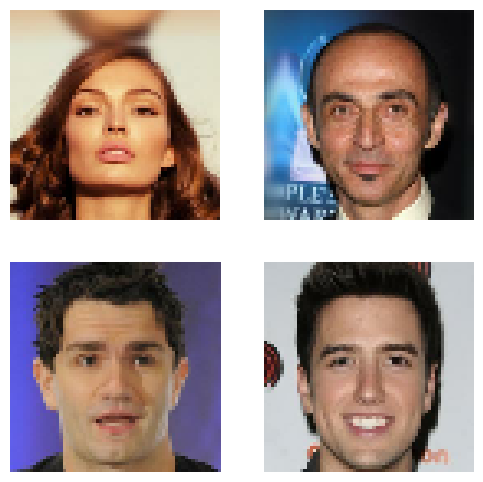

In [12]:
plt.figure(figsize = (6,6))
k=0
n = 4
for i in range(n):
  ax = plt.subplot(2,2, k+1)
  plt.imshow((d[i]+1)/2)
  plt.axis("off")
  k+=1

## Model